<a href="https://colab.research.google.com/github/jieunjeon/Data-Science-Fundamental/blob/master/Exploration/02_rock_scissor_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATION 2

## Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip -qq /content/drive/MyDrive/aiffel/EXP_2_data/papers_complete.zip
!unzip -qq /content/drive/MyDrive/aiffel/EXP_2_data/rocks_complete.zip
!unzip -qq /content/drive/MyDrive/aiffel/EXP_2_data/scissors_complete.zip

### Set the path and check the size of an image

In [254]:
# set the path for each image folder
img_path = '/content/drive/MyDrive/aiffel/EXP_2_data/';
img_path_rocks = img_path + 'rocks_complete/';
img_path_papers = img_path + 'papers_complete/';
img_path_scissors = img_path + 'scissors_complete/';

In [255]:
# check for the image size
from PIL import Image
image1 = Image.open(img_path_rocks+'rock (1).jpg')
image1.show()
print("size of the original image:", image1.size)

size of the original image: (224, 224)


Change the size of the images to 28 X 28

In [256]:
import os, glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

  # Change the image size to 28 X 28
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
resize_images(img_path_rocks)
resize_images(img_path_papers)
resize_images(img_path_scissors)

print("train images resize completed!")

1105  images to be resized.
1105  images resized.
1108  images to be resized.
1108  images resized.
994  images to be resized.
994  images resized.
train images resize completed!


### Load the data

In [257]:
print(f'{img_path_papers}*.jpg')

/content/drive/MyDrive/aiffel/EXP_2_data/papers_complete/*.jpg


In [259]:
import numpy as np

def load_data(path_scissors, path_rocks, path_papers, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(f'{path_scissors}*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
     
      
    for file in glob.iglob(f'{path_rocks}*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  

    for file in glob.iglob(f'{path_papers}*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(img_path_scissors, img_path_rocks, img_path_papers, number_of_data=3207)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3207 입니다.
x_train shape: (3207, 28, 28, 3)
y_train shape: (3207,)


### Check the trained data with the label

라벨:  0


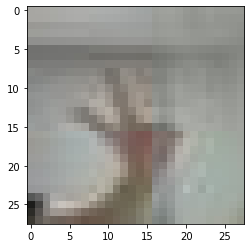

In [260]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## Architect the Deep Learning Network


In [261]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# TODO
channel_1 = 16
channel_2 = 32
dense = 32
train_epoch = 10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_49 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_99 (Dense)             

## Train the dataset

### Split the train & test dataset

In [262]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train)

x_train_norm = x_train/255.0  # normalize to 0~1
x_test_norm = x_test/255.0   

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2405, 28, 28, 3)
(802, 28, 28, 3)
(2405,)
(802,)


### Compile and Fit the model

In [263]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (2405, 28, 28, 3)
Before Reshape - x_test_norm shape: (802, 28, 28, 3)
After Reshape - x_train_reshaped shape: (2405, 28, 28, 3)
After Reshape - x_test_reshaped shape: (802, 28, 28, 3)


In [264]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=train_epoch)

Epoch 1/10
76/76 [==============================] - 2s 18ms/step - loss: 1.0614 - accuracy: 0.4312
Epoch 2/10
76/76 [==============================] - 1s 18ms/step - loss: 0.9013 - accuracy: 0.5721
Epoch 3/10
76/76 [==============================] - 1s 19ms/step - loss: 0.7585 - accuracy: 0.6678
Epoch 4/10
76/76 [==============================] - 1s 19ms/step - loss: 0.5962 - accuracy: 0.7746
Epoch 5/10
76/76 [==============================] - 1s 19ms/step - loss: 0.4959 - accuracy: 0.8170
Epoch 6/10
76/76 [==============================] - 1s 19ms/step - loss: 0.4205 - accuracy: 0.8341
Epoch 7/10
76/76 [==============================] - 1s 19ms/step - loss: 0.3488 - accuracy: 0.8699
Epoch 8/10
76/76 [==============================] - 1s 18ms/step - loss: 0.2788 - accuracy: 0.9019
Epoch 9/10
76/76 [==============================] - 1s 19ms/step - loss: 0.2413 - accuracy: 0.9119
Epoch 10/10
76/76 [==============================] - 1s 18ms/step - loss: 0.2084 - accuracy: 0.9306


## Evaluate

#### Evaluate with splitted data

In [265]:
model.evaluate(x_test_reshaped, y_test)

26/26 [==============================] - 0s 7ms/step - loss: 0.2557 - accuracy: 0.9127


[0.2556585371494293, 0.9127181768417358]

## (Unseen) Test Data Preparation
손예림님's data is not included in the training dataset, so I wanted to use this data to measure the accuracy of the model


In [266]:
test_img_path_rocks = img_path + 'rocks_test/';
test_img_path_papers = img_path + 'papers_test/';
test_img_path_scissors = img_path + 'scissors_test/';

resize_images(test_img_path_rocks)
resize_images(test_img_path_papers)
resize_images(test_img_path_scissors)
print("test images resize completed!")

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
test images resize completed!


#### Load the test (unseen) images

In [267]:
(x_test2, y_test2)=load_data(test_img_path_scissors, test_img_path_rocks, test_img_path_papers, number_of_data=300)
x_test_norm2 = x_test2/255.0   # normalize the input to have a value btn 0~1

print("x_train shape: {}".format(x_test2.shape))
print("y_train shape: {}".format(y_test2.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


Check loaded data

라벨:  0


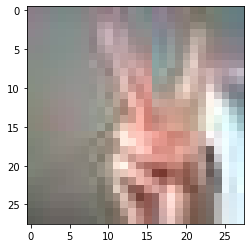

In [268]:
import matplotlib.pyplot as plt
plt.imshow(x_test2[0])
print('라벨: ', y_test2[0])

Reshape the test data

In [269]:
print("Before Reshape - x_test2_norm shape: {}".format(x_test_norm2.shape))

x_test2_reshaped=x_test_norm2.reshape( -1, 28, 28, 3)

print("After Reshape - x_test2_reshaped shape: {}".format(x_test2_reshaped.shape))

Before Reshape - x_test2_norm shape: (300, 28, 28, 3)
After Reshape - x_test2_reshaped shape: (300, 28, 28, 3)


## Improve the model and apply the train dataset again

In [270]:
channel_1 = 20
channel_2 = 40
dense = 30
train_epoch = 15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 26, 26, 20)        560       
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 11, 11, 40)        7240      
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 5, 5, 40)          0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 1000)              0         
_________________________________________________________________
dense_100 (Dense)            (None, 30)                30030     
_________________________________________________________________
dense_101 (Dense)            

In [271]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=train_epoch)

Epoch 1/15
76/76 [==============================] - 2s 23ms/step - loss: 1.0606 - accuracy: 0.4316
Epoch 2/15
76/76 [==============================] - 2s 23ms/step - loss: 0.8862 - accuracy: 0.6162
Epoch 3/15
76/76 [==============================] - 2s 24ms/step - loss: 0.6956 - accuracy: 0.7060
Epoch 4/15
76/76 [==============================] - 2s 27ms/step - loss: 0.5533 - accuracy: 0.7775
Epoch 5/15
76/76 [==============================] - 2s 24ms/step - loss: 0.4415 - accuracy: 0.8387
Epoch 6/15
76/76 [==============================] - 2s 24ms/step - loss: 0.3840 - accuracy: 0.8511
Epoch 7/15
76/76 [==============================] - 2s 24ms/step - loss: 0.3038 - accuracy: 0.8877
Epoch 8/15
76/76 [==============================] - 2s 24ms/step - loss: 0.2691 - accuracy: 0.9085
Epoch 9/15
76/76 [==============================] - 2s 24ms/step - loss: 0.2311 - accuracy: 0.9202
Epoch 10/15
76/76 [==============================] - 2s 23ms/step - loss: 0.1921 - accuracy: 0.9372
Epoch 11/

### Evaluate the model accuracy with the unseen data

In [272]:
test_loss, test_accuracy = model.evaluate(x_test2_reshaped, y_test2, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.9325 - accuracy: 0.6667
test_loss: 1.9324795007705688 
test_accuracy: 0.6666666865348816


Hoooooray! 